# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline  


# Reading the Dataset

In [2]:
df = pd.read_csv('housing.csv')


# Show Top 5 Records

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Shape of the Dataset

In [4]:
df.shape

(20640, 10)

# Summary of the Dataset

In [5]:
# Display summary statistics for a dataframe


df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Check Datatypes in the Dataset

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Exploring The Data

In [7]:
## Defining Numerical and Categorical Features

numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categoric_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

## Printing the Columns

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))

print('We have {} categorical features: {}'.format(len(categoric_features),categoric_features))

We have 9 numerical features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
We have 1 categorical features: ['ocean_proximity']


## Univariate Analysis

Numerical Feature

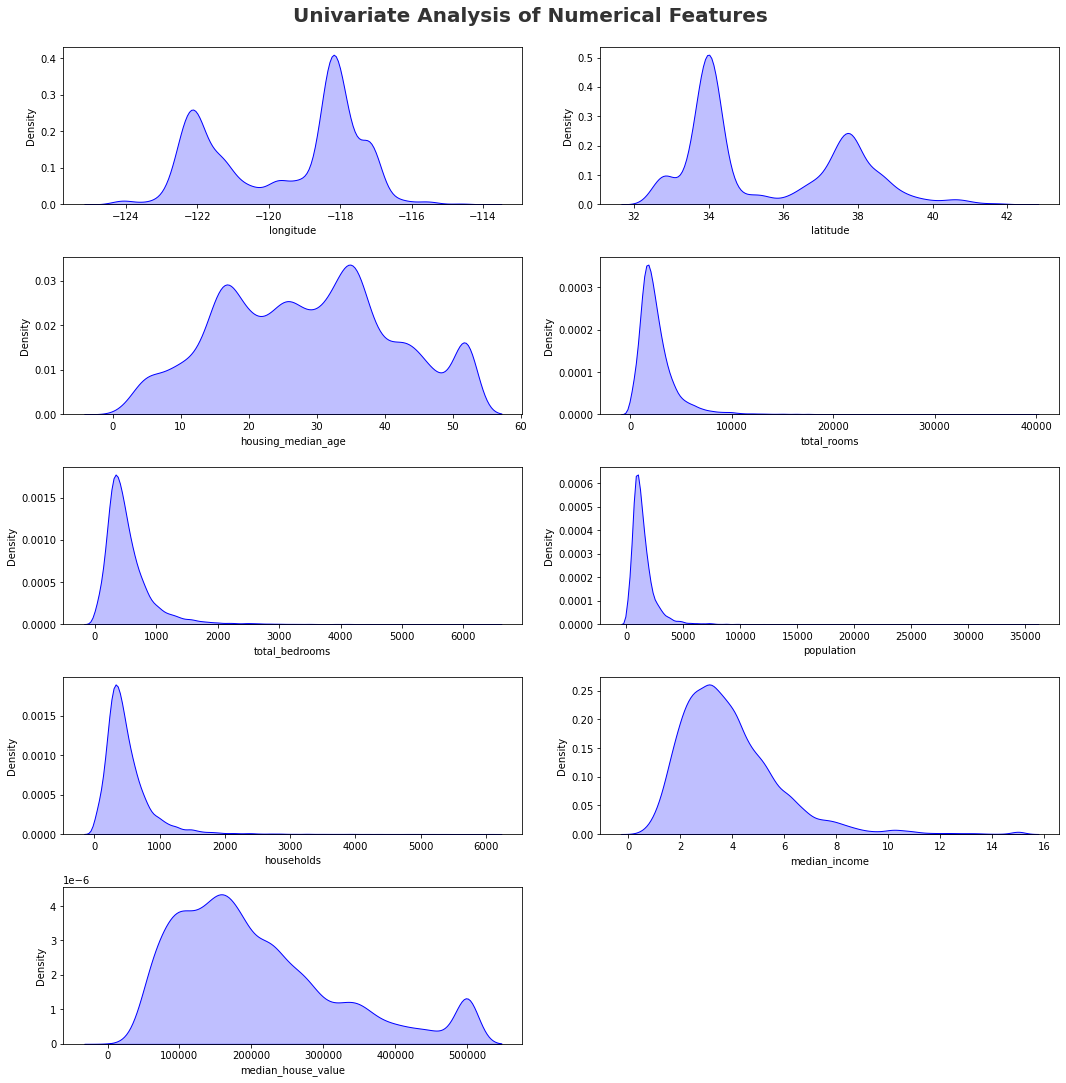

In [8]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
   

Categorical Feature

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'NEAR BAY'),
  Text(1, 0, '<1H OCEAN'),
  Text(2, 0, 'INLAND'),
  Text(3, 0, 'NEAR OCEAN'),
  Text(4, 0, 'ISLAND')])

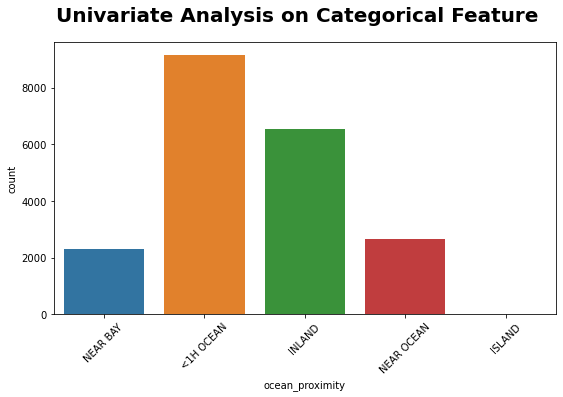

In [9]:
plt.figure(figsize=(9,5))
plt.suptitle("Univariate Analysis on Categorical Feature",fontsize=20,fontweight='bold')

sns.countplot(x=df['ocean_proximity'])
plt.xlabel('ocean_proximity')
plt.xticks(rotation=45)


## Multivariate Analysis

### Check Multicollinearity in Numerical features

In [10]:
df[list(df.columns)[:-1]].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


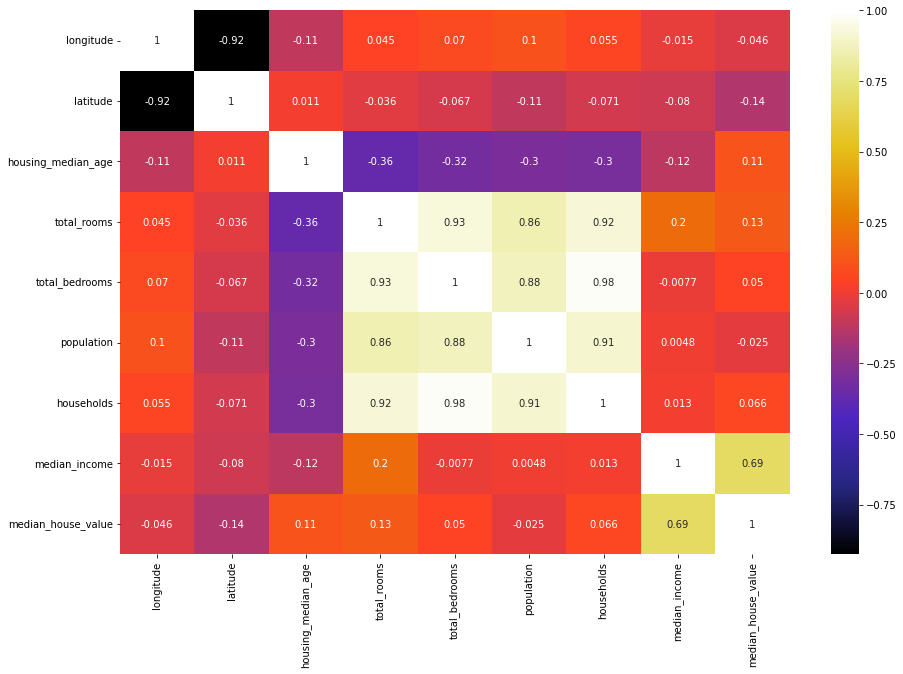

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

## Checking the null Values

In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Focusing on replacing The null values

In [13]:
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [14]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [15]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0])

In [16]:
df['total_bedrooms'].isnull().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Plt top 5 median_income house

In [20]:
income_index = df.median_income.value_counts().index
income_val=df.median_income.value_counts().index

([<matplotlib.patches.Wedge at 0x1dd2ef91c10>,
 [Text(1.031876191353163, 0.38109254219741734, '3.125'),
  Text(-0.8153749257423614, 0.7383520369516421, '15.0001'),
  Text(-0.3071817495943131, -1.0562383124637058, '2.875'),
  Text(0.36645875944532846, -1.0371634286002334, '2.625'),
  Text(0.9822194627663284, -0.4952220986214422, '4.125')],
 [Text(0.5628415589199071, 0.20786865938040944, '11.26%'),
  Text(-0.4447499594958334, 0.40273747470089566, '54.05%'),
  Text(-0.16755368159689804, -0.5761299886165667, '10.36%'),
  Text(0.19988659606108822, -0.565725506509218, '9.46%'),
  Text(0.5357560705998154, -0.2701211447026048, '14.86%')])

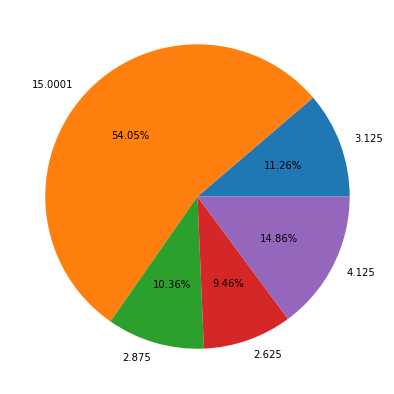

In [36]:
plt.figure(figsize=(10,7))

plt.pie(income_val[:5],labels=income_index[:5],autopct='%1.2f%%')

## Plot top 5 median_house_value

In [33]:
house_index = df.median_house_value.value_counts().index
house_val=df.median_house_value.value_counts().index

([<matplotlib.patches.Wedge at 0x1dd2eff2250>,
 [Text(0.15654464470516055, 1.0888038272407639, '500001.0'),
  Text(-1.0936970109305986, -0.11758761959268668, '137500.0'),
  Text(-0.6273531509938682, -0.9035640674230383, '162500.0'),
  Text(0.19530982655886595, -1.0825220882963755, '112500.0'),
  Text(0.9460159246017287, -0.5612965975310528, '187500.0')],
 [Text(0.08538798802099665, 0.5938929966767802, '45.45%'),
  Text(-0.5965620059621446, -0.06413870159601091, '12.50%'),
  Text(-0.3421926278148372, -0.49285312768529355, '14.77%'),
  Text(0.10653263266847234, -0.5904665936162048, '10.23%'),
  Text(0.5160086861463974, -0.3061617804714833, '17.05%')])

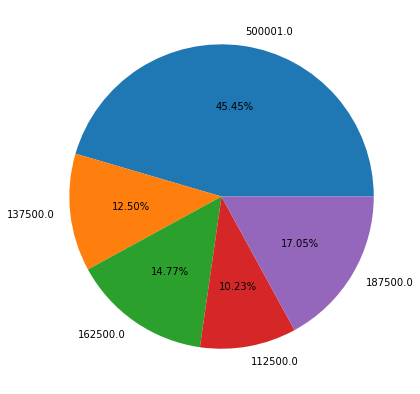

In [37]:
plt.figure(figsize=(10,7))

plt.pie(house_val[:5],labels=house_index[:5],autopct='%1.2f%%')

## Top 5 housing_median_age pie chart

In [38]:
houseAge_index = df.housing_median_age.value_counts().index
houseAge_val=df.housing_median_age.value_counts().index

([<matplotlib.patches.Wedge at 0x1dd2f065d60>,
 [Text(0.5499999702695115, 0.9526279613277875, '52.0'),
  Text(-1.0433901091385263, 0.3483347242981874, '36.0'),
  Text(-0.4914782377139582, -0.9840981362920987, '35.0'),
  Text(0.5879124863004829, -0.9297090450522597, '16.0'),
  Text(1.0361641140562627, -0.36927486881996224, '17.0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5691218777119234, 0.1900007587081022, '23.08%'),
  Text(-0.2680790387530681, -0.536780801613872, '22.44%'),
  Text(0.32067953798208154, -0.5071140245739598, '10.26%'),
  Text(0.5651804258488705, -0.2014226557199794, '10.90%')])

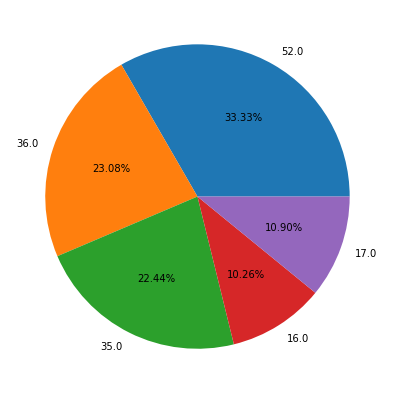

In [40]:
plt.figure(figsize=(10,7))

plt.pie(houseAge_val[:5],labels=houseAge_index[:5],autopct='%1.2f%%')

# Observation
 1. Highest median_income is 15.0001

## Which Country near sea has highest population?

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

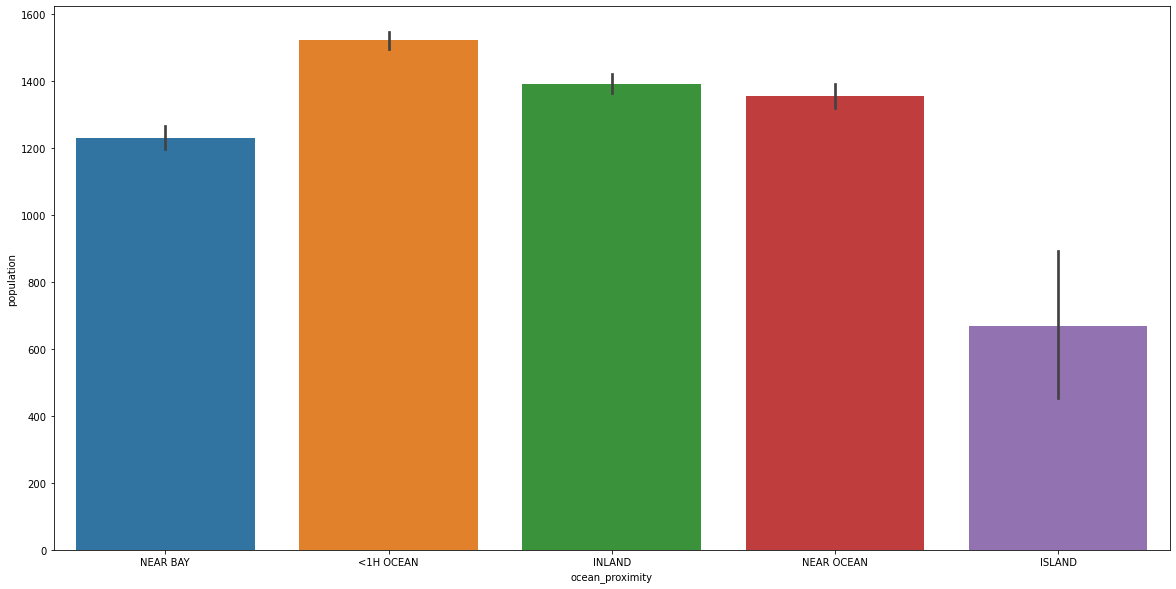

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


sns.barplot(x='ocean_proximity',y='population',data=df)

### Observation

1.'<1H OCEAN' of ocean_proximity has highest population 

2. island of ocean_proximity has lowest population

3. INLAND and NEAR OCEAN of ocean_proximity has approximately same population.

### What is meadian house value as compairing to housing mredian age

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

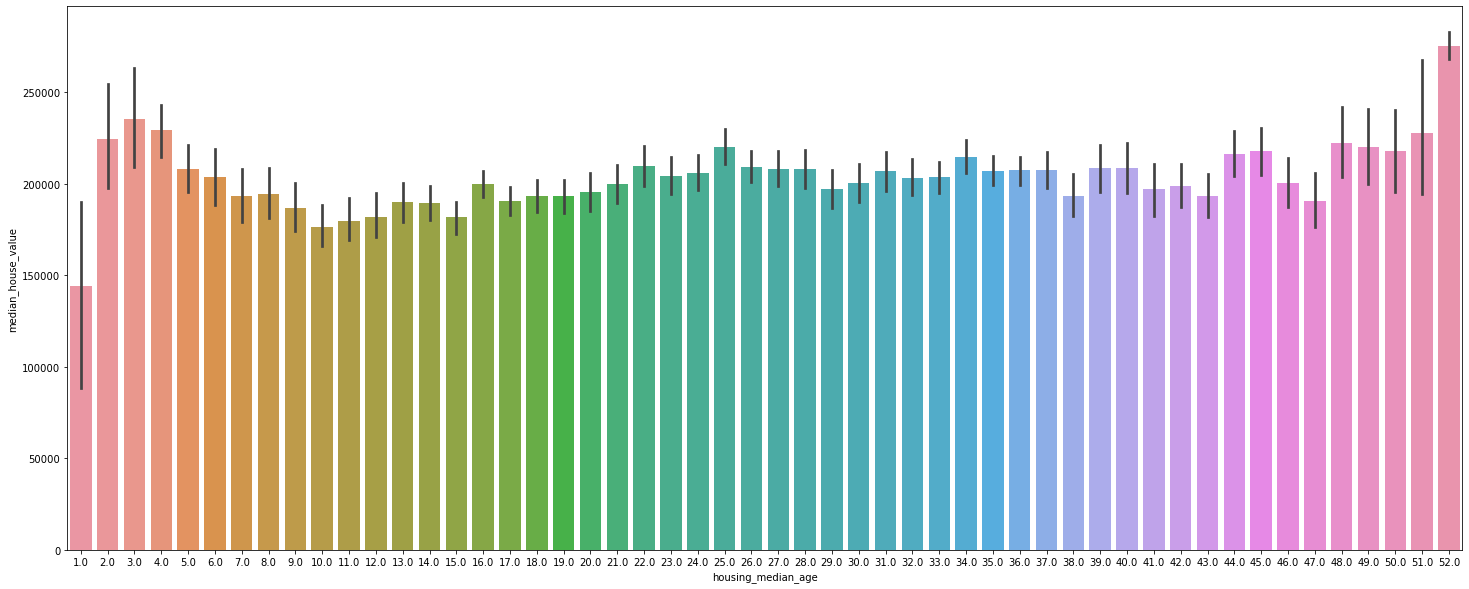

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(25,10)


sns.barplot(x='housing_median_age',y='median_house_value',data=df)

# Observation

The house which has highest median_age 52.0 has highest median_house_value
The house which has lowest medianAge 1.0 has lowest median_house_value

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Which household has highest and lowest total_rooms?

In [29]:
## Highest Rooms

df.groupby(["households","total_rooms"]).size().reset_index().tail(1)

,households,total_rooms,0
20421,6082.0,32627.0,1


In [30]:
## Lowest Rooms

df.groupby(["households","total_rooms"]).size().reset_index().head(1)

,households,total_rooms,0
0,1.0,8.0,1


In [ ]:
## Which household has highest and lowest total_bedrooms?

In [31]:
## Lowest bedrooms

df.groupby(["households","total_bedrooms"]).size().reset_index().head(1)

,households,total_bedrooms,0
0,1.0,1.0,1


In [32]:
## highest bedrooms

df.groupby(["households","total_rooms"]).size().reset_index().tail(1)

,households,total_rooms,0
20421,6082.0,32627.0,1


## Which household has highest and lowest median_house_value?

In [41]:
#Highest median_value

df.groupby(["households","median_house_value"]).size().reset_index().tail(1)



,households,median_house_value,0
20139,6082.0,118800.0,1


In [42]:
#Lowest median_value

df.groupby(["households","median_house_value"]).size().reset_index().head(1)

,households,median_house_value,0
0,1.0,500001.0,1


## Which ocean_proximity has highest  and lowest median_house_value ?

In [43]:
#Highest median_value

df.groupby(["ocean_proximity","median_house_value"]).size().reset_index().tail(1)



,ocean_proximity,median_house_value,0
7934,NEAR OCEAN,500001.0,212


In [44]:
#Lowest median_value

df.groupby(["ocean_proximity","median_house_value"]).size().reset_index().head(1)

,ocean_proximity,median_house_value,0
0,<1H OCEAN,17500.0,1


## Which ocean_proximity has highest and lowest median income ?

In [45]:
#Highest median_value

df.groupby(["ocean_proximity","median_income"]).size().reset_index().tail(1)

,ocean_proximity,median_income,0
16242,NEAR OCEAN,15.0001,9


In [46]:
#Lowest median_value

df.groupby(["ocean_proximity","median_income"]).size().reset_index().head(1)

,ocean_proximity,median_income,0
0,<1H OCEAN,0.4999,3


## Boxplot to find Outliers in the features

<AxesSubplot:>

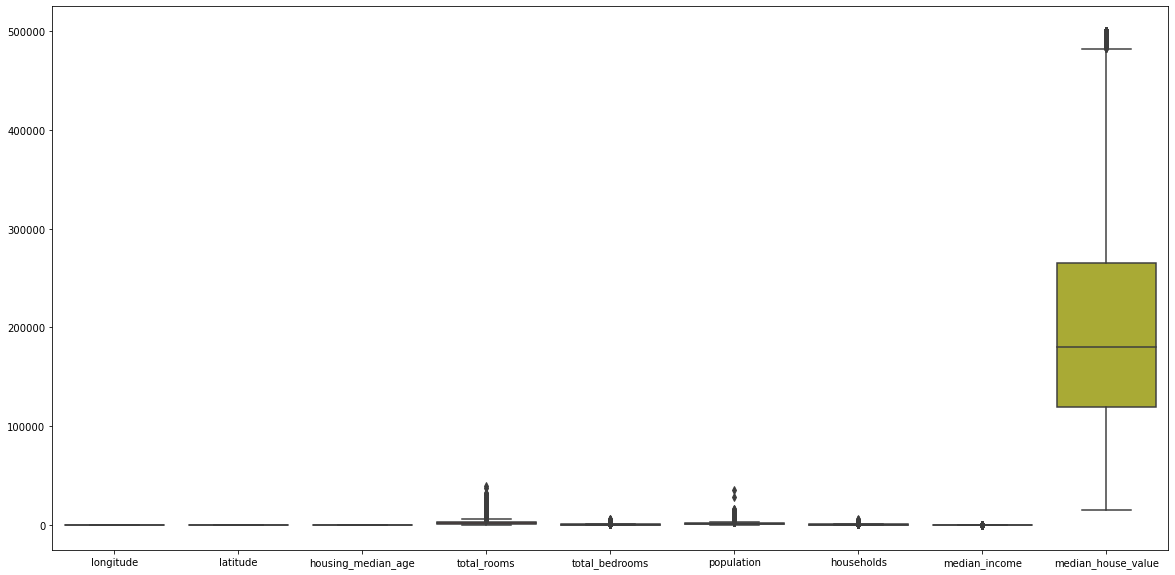

In [51]:
sns.boxplot(data = df,orient="v")


## Boxplot of house_median_age Vs house_median_value

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

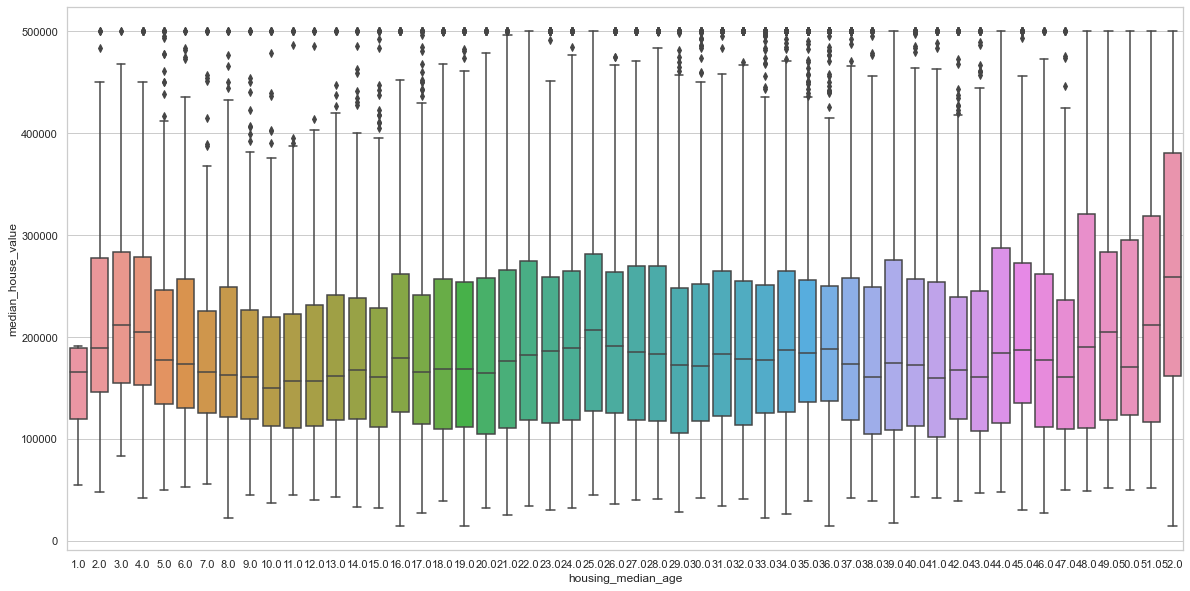

In [53]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='housing_median_age', y ='median_house_value', data = df)


## Boxplot of population Vs ocean_proximity

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

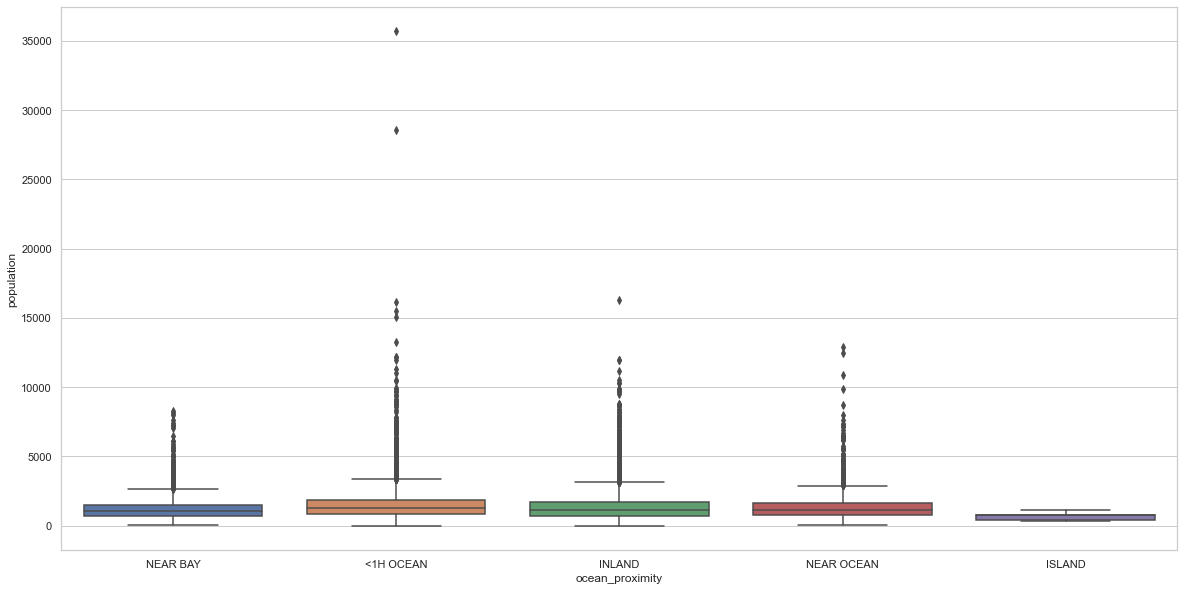

In [56]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='ocean_proximity', y ='population', data = df)


## Boxplot of median_income Vs ocean_proximity

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

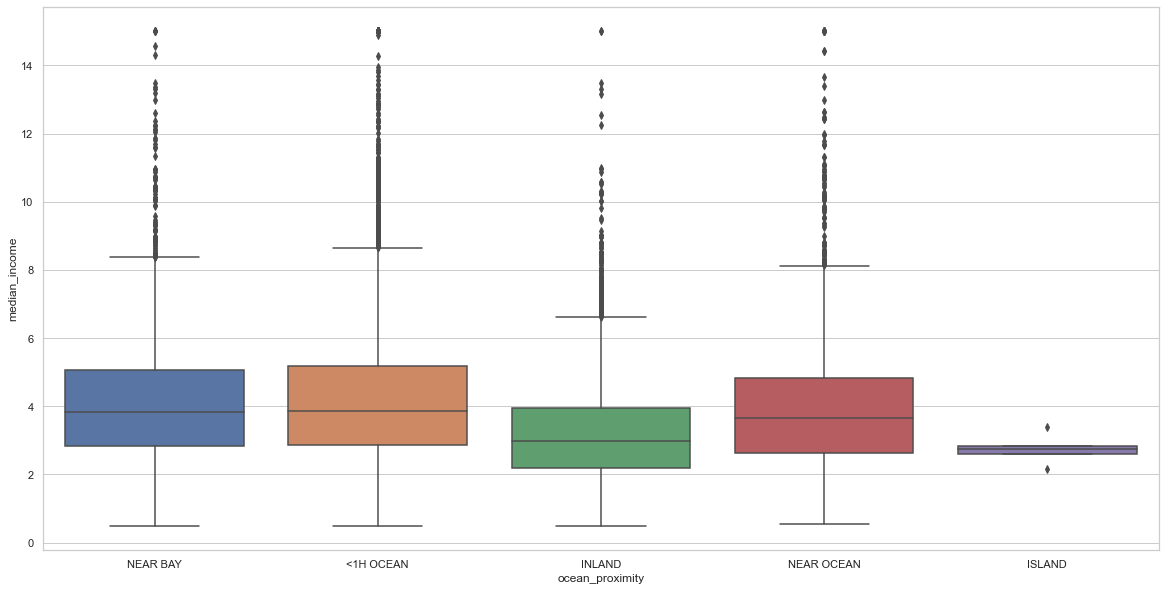

In [55]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='ocean_proximity', y ='median_income', data = df)


## Boxplot of household Vs ocean_proximity

<AxesSubplot:xlabel='ocean_proximity', ylabel='households'>

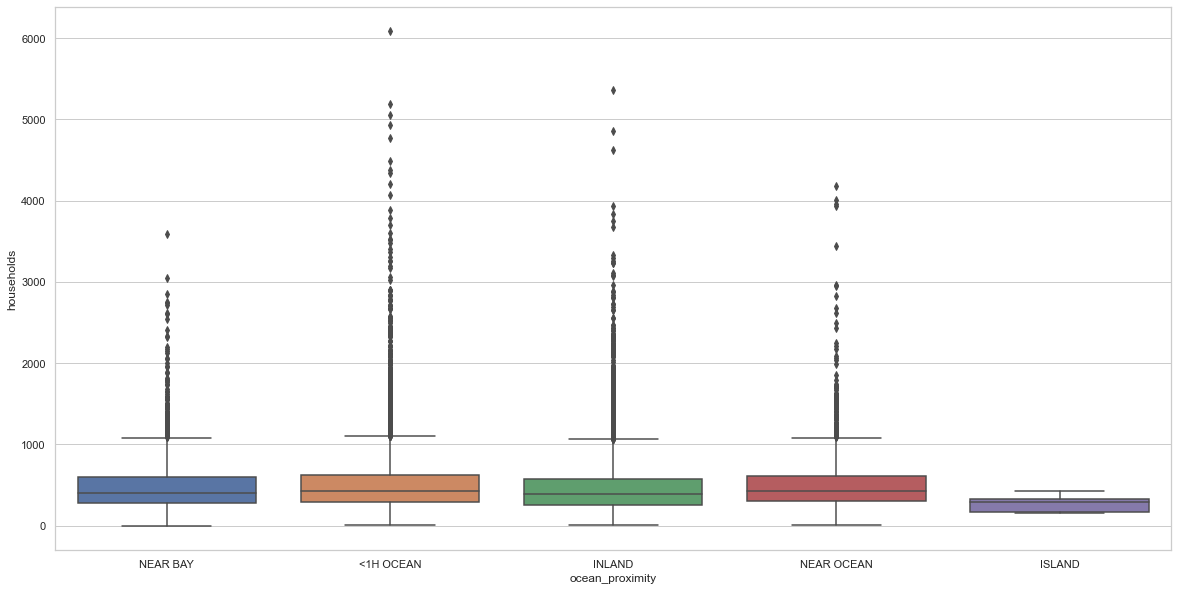

In [58]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='ocean_proximity', y ='households', data = df)
